In [224]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 30

import glob
import matplotlib.pyplot as plt


## Step 1: Load the data

In [225]:
# read the data
datapath = "data/university_data/"

cwur = pd.read_csv(datapath + "/cwurData.csv", header=0)
cwur.set_index(["year", "institution"], inplace=True)
display(cwur)

world_rank         country  \
year institution                                                         
2012 Harvard University                              1             USA   
     Massachusetts Institute of Technology           2             USA   
     Stanford University                             3             USA   
     University of Cambridge                         4  United Kingdom   
     California Institute of Technology              5             USA   
     Princeton University                            6             USA   
     University of Oxford                            7  United Kingdom   
     Yale University                                 8             USA   
     Columbia University                             9             USA   
     University of California, Berkeley             10             USA   
     University of Chicago                          11             USA   
     Cornell University                             12             USA   
     University of Pennsylvania                     13             USA   
     University of Tokyo                            14           Japan   
     Johns Hopkins University                       15             USA   
...                                                ...             ...   
2015 University of Bucharest                       986         Romania   
     Babeș-Bolyai University                       987         Romania   
     Mansoura University                           988           Egypt   
     University of Pau and Pays de l'Adour         989          France   
     Henan Normal University                       990           China   
     Xidian University                             991           China   
     Federal University of Bahia                   992          Brazil   
     Southwest Jiaotong University                 993           China   
     Ryerson University                            994          Canada   
     King Abdulaziz University                     995    Saudi Arabia   
     University of the Algarve                     996        Portugal   
     Alexandria University                         997           Egypt   
     Federal University of Ceará                   998          Brazil   
     University of A Coruña                        999           Spain   
     China Pharmaceutical University              1000           China   

                                            national_rank  \
year institution                                            
2012 Harvard University                                 1   
     Massachusetts Institute of Technology              2   
     Stanford University                                3   
     University of Cambridge                            1   
     California Institute of Technology                 4   
     Princeton University                               5   
     University of Oxford                               2   
     Yale University                                    6   
     Columbia University                                7   
     University of California, Berkeley                 8   
     University of Chicago                              9   
     Cornell University                                10   
     University of Pennsylvania                        11   
     University of Tokyo                                1   
     Johns Hopkins University                          12   
...                                                   ...   
2015 University of Bucharest                            1   
     Babeș-Bolyai University                            2   
     Mansoura University                                3   
     University of Pau and Pays de l'Adour             49   
     Henan Normal University                           80   
     Xidian University                                 81   
     Federal University of Bahia                       17   
     Southwest Jiaotong University                     82   
     Ryerson Un

In [226]:
shanghai = pd.read_csv(datapath + "/shanghaiData.csv", header=0)
uni2country = pd.read_csv(datapath + "/school_and_country_table.csv", header=0)
shanghai = shanghai.merge(uni2country, left_on = "university_name", right_on = "school_name")
del shanghai['school_name']
shanghai.set_index("year",inplace=True)
display(shanghai)

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,country
year,,,,,,,,,,,
2005,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,United States of America
2006,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.6,United States of America
2007,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,73.0,United States of America
2008,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.1,United States of America
2009,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,74.8,United States of America
2010,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,69.2,United States of America
2011,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,70.5,United States of America
2012,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,71.1,United States of America
2013,1,Harvard University,1.0,100.0,100.0,100.0,100.0,100.0,100.0,72.5,United States of America


In [227]:
"""
educ_attainment = pd.read_csv(datapath + "/educational_attainment_supplementary_data.csv", header=0)
timesData = pd.read_csv(datapath + "/timesData.csv", header=0)

display(educ_attainment)
display(timesData)
"""



'\neduc_attainment = pd.read_csv(datapath + "/educational_attainment_supplementary_data.csv", header=0)\ntimesData = pd.read_csv(datapath + "/timesData.csv", header=0)\n\ndisplay(educ_attainment)\ndisplay(timesData)\n'

In [228]:
# the file must first be cleaned by deleting the initial spaces...

educ_expenditure = pd.read_csv(datapath + "/education_expenditure_supplementary_data.csv",
                               header=0,
                               quotechar="\"")

# replace the country names by the above names
country_dict = {"Korea, Republic of" : "South Korea",
                "Russian Federation" : "Russia",
                "United States" : "United States of America",
                "Slovak Republic" : "Slovakia"}
for key, value in country_dict.items():
    educ_expenditure.replace(key, value, inplace=True)

educ_expenditure["institute_type"]=educ_expenditure["institute_type"].str.strip()


# reformat the dataframe
years = [1995,2000,2005,2009,2010,2011]

concat_list = []
for year in years:
    cols = ["country","institute_type","direct_expenditure_type", str(year)]
    concat_df = educ_expenditure.copy()[cols]
    concat_df["year"]=year
    concat_df.rename(columns = {str(year) : "percentage of GDP"}, inplace=True)
    concat_list.append(concat_df)


    
    
educ_expenditure_processed = pd.concat(concat_list, axis=0, ignore_index=True, sort=False)

institute_types = set(educ_expenditure_processed["institute_type"])
direct_expenditure_types = set(educ_expenditure_processed["direct_expenditure_type"])

merge_list = []
for institute_type in institute_types:
    for direct_expenditure_type in direct_expenditure_types:
        merge_df =educ_expenditure_processed[(educ_expenditure_processed["institute_type"]==institute_type) & 
                                   (educ_expenditure_processed["direct_expenditure_type"]==direct_expenditure_type)].copy()
        merge_df = merge_df[["country", "year", "percentage of GDP"]]
        merge_df.rename(columns = {"percentage of GDP": "percentage of GDP," + institute_type + "," + direct_expenditure_type},
                       inplace=True)
        merge_list.append(merge_df)


for merge_df in merge_list[1:]:
    merge_list[0]=merge_list[0].merge(merge_df, on = ["country", "year"])

educ_expenditure_processed = merge_list[0]
educ_expenditure_processed.set_index(["year", "country"], inplace=True)
educ_expenditure_processed.columns = pd.MultiIndex.from_tuples(
    [(c.split(",")[0], c.split(",")[1], c.split(",")[2]) for c in educ_expenditure_processed.columns]
     )
educ_expenditure_processed
    
    



percentage of GDP                 \
                               All Institutions                  
                                          Total Public Private   
year country                                                     
1995 OECD Average                           NaN    4.9     NaN   
     Australia                              NaN    4.5     NaN   
     Austria                                NaN    5.3     NaN   
     Belgium                                NaN    5.0     NaN   
     Canada                                 NaN    5.8     NaN   
     Chile                                  NaN    NaN     NaN   
     Czech Republic                         NaN    4.8     NaN   
     Denmark                                NaN    6.5     NaN   
     Estonia                                NaN    NaN     NaN   
     Finland                                NaN    6.6     NaN   
     France                                 NaN    5.8     NaN   
     Germany                                NaN    4.5     NaN   
     Greece                                 NaN    3.7     NaN   
     Hungary                                NaN    4.9     NaN   
     Iceland                                NaN    4.5     NaN   
...                                         ...    ...     ...   
2011 Netherlands                            6.2    5.3     0.9   
     New Zealand                            7.5    6.3     1.2   
     Norway                                 NaN    7.3     NaN   
     Poland                                 5.5    4.8     0.7   
     Portugal                               5.5    5.1     0.4   
     Slovakia                               4.4    3.8     0.5   
     Slovenia                               5.9    5.3     0.7   
     Spain                                  5.5    4.7     0.8   
     Sweden                                 6.3    6.2     0.2   
     Switzerland                            5.6    5.2     0.4   
     Turkey                                 NaN    NaN     NaN   
     United Kingdom                         6.4    5.6     0.8   
     United States of America               6.9    4.7     2.2   
     Brazil                                 NaN    5.9     NaN   
     Russia                                 4.6    3.9     0.7   

                                                                            \
                              Elementary and Secondary Institutions          
                                                              Total Public   
year country                                                                 
1995 OECD Average                                               NaN    3.5   
     Australia                                                  NaN    3.2   
     Austria                                                    NaN    3.8   
     Belgium                                                    NaN    3.4   
     Canada                                                     NaN    4.0   
     Chile                                                      NaN    NaN   
     Czech Republic                                             NaN    3.4   
     Denmark                                                    NaN    4.2   
     Estonia                                                    NaN    NaN   
     Finland                                                    NaN    4.2   
     France                                                     NaN    4.1   
     Germany                                                    NaN    2.9   
     Greece                                                     NaN    2.8   
     Hungary                                                    NaN    3.3   
     Iceland                                                    NaN    3.4   
...                                                             ...    ...   
2011 Netherlands                                                4.0    3.6   
     New Zealand                                                5.4    4.8   
   

In [264]:
uni_exp=educ_expenditure_processed.merge(shanghai, on = ["year", "country"]).copy()
#print(uni_exp.columns)
uni_exp["world_rank_min"] = uni_exp["world_rank"].str.split("-").str[0].astype(int)
uni_exp["world_rank_max"] = uni_exp["world_rank"].str.split("-").str[-1].astype(int)

# display(uni_exp[uni_exp["world_rank_max"]<=uni_exp["world_rank_min"]])

"""
zip_between = zip(
    uni_exp["world_rank"].str.split("-").str[0].astype(int),
    uni_exp["world_rank"].str.split("-").str[-1].astype(int)
)
"""

uni_exp['world_rank_rand_between'] = uni_exp.apply(lambda x: np.random.randint(x.world_rank_min, x.world_rank_max + 1), axis=1)


display(uni_exp)

,country,"(percentage of GDP, All Institutions, Total)","(percentage of GDP, All Institutions, Public)","(percentage of GDP, All Institutions, Private)","(percentage of GDP, Elementary and Secondary Institutions, Total)","(percentage of GDP, Elementary and Secondary Institutions, Public)","(percentage of GDP, Elementary and Secondary Institutions, Private)","(percentage of GDP, Higher Education Institutions, Total)","(percentage of GDP, Higher Education Institutions, Public)","(percentage of GDP, Higher Education Institutions, Private)",...,total_score,alumni,award,hici,ns,pub,pcp,world_rank_min,world_rank_max,world_rank_rand_between
year,,,,,,,,,,,,,,,,,,,,,
2005,Australia,NaN,4.3,NaN,NaN,3.4,NaN,NaN,0.8,NaN,...,26.0,15.4,14.4,22.2,18.7,53.5,19.9,82,82,82
2005,Australia,NaN,4.3,NaN,NaN,3.4,NaN,NaN,0.8,NaN,...,NaN,16.6,0.0,7.9,19.9,50.1,18.9,101,152,124
2005,Australia,NaN,4.3,NaN,NaN,3.4,NaN,NaN,0.8,NaN,...,NaN,19.8,0.0,19.2,17.8,54.5,19.7,101,152,148
2005,Australia,NaN,4.3,NaN,NaN,3.4,NaN,NaN,0.8,NaN,...,NaN,0.0,0.0,19.2,14.3,47.0,17.6,153,202,191
2005,Australia,NaN,4.3,NaN,NaN,3.4,NaN,NaN,0.8,NaN,...,NaN,0.0,0.0,13.6,15.9,25.6,17.9,203,300,285
2005,Australia,NaN,4.3,NaN,NaN,3.4,NaN,NaN,0.8,NaN,...,NaN,0.0,0.0,7.9,15.4,44.6,14.7,203,300,298
2005,Australia,NaN,4.3,NaN,NaN,3.4,NaN,NaN,0.8,NaN,...,NaN,0.0,0.0,13.6,5.5,27.5,15.4,301,400,318
2005,Australia,NaN,4.3,NaN,NaN,3.4,NaN,NaN,0.8,NaN,...,NaN,0.0,0.0,7.9,6.4,23.1,14.9,401,500,443
2005,Australia,NaN,4.3,NaN,NaN,3.4,NaN,NaN,0.8,NaN,...,NaN,0.0,0.0,7.9,8.3,24.2,12.2,401,500,418


## Step 2: Explore the data

RANK
by year


'\n# top 100 data\nuni_exp100 = uni_exp[uni_exp["world_rank"]<101]\nuni_exp100.plot([(\'percentage of GDP\', \'All Institutions\', \'Public\')], "world_rank", kind="scatter", figsize = (12,8))\n'

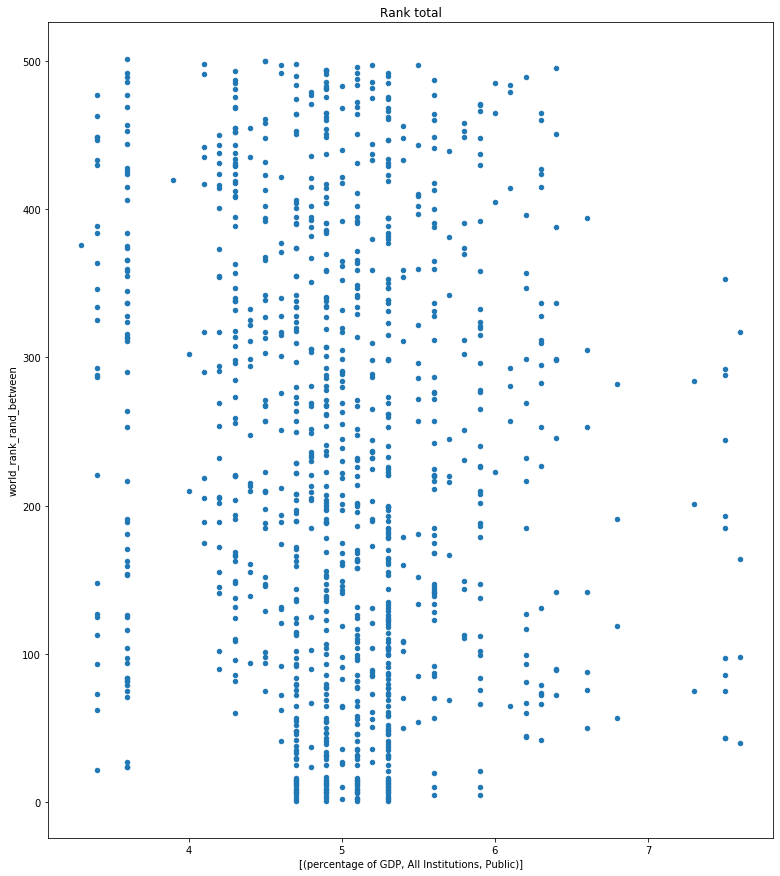

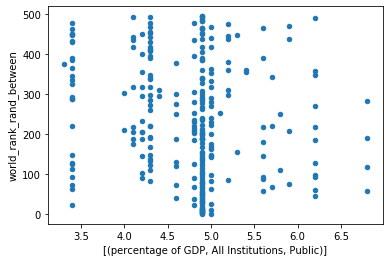

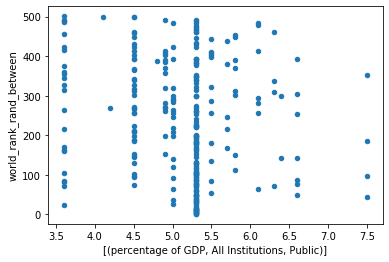

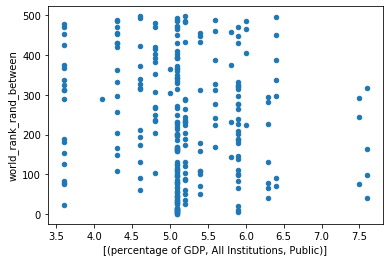

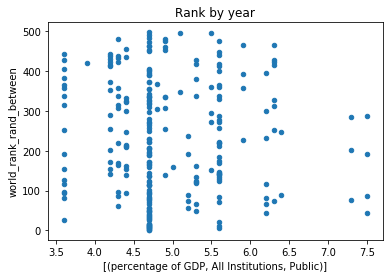

In [268]:
"""
# score vs percentage of gdp
# total data
uni_exp.plot([('percentage of GDP', 'All Institutions', 'Public')], "total_score", kind="scatter")
# by year
uni_exp.groupby("year").plot([('percentage of GDP', 'All Institutions', 'Public')], "total_score", kind="scatter")
"""

print("RANK")
# rank vs percentage of gdp
# total data
uni_exp.plot([('percentage of GDP', 'All Institutions', 'Public')], "world_rank_rand_between", kind="scatter", figsize = (13,15))
plt.title("Rank total")
plt.show
print("by year")
# by year
uni_exp.groupby("year").plot([('percentage of GDP', 'All Institutions', 'Public')], "world_rank_rand_between", kind="scatter")
plt.title("Rank by year")
plt.show


"""
# top 100 data
uni_exp100 = uni_exp[uni_exp["world_rank"]<101]
uni_exp100.plot([('percentage of GDP', 'All Institutions', 'Public')], "world_rank", kind="scatter", figsize = (12,8))
"""





## Step 3: Model the data